In [9]:
%pip install pandas
%pip install matplotlib

ERROR:root:code for hash blake2b was not found.
Traceback (most recent call last):
  File "/Users/quang.nguyen/.pyenv/versions/3.12.3/lib/python3.12/hashlib.py", line 245, in <module>
    globals()[__func_name] = __get_hash(__func_name)
                             ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/quang.nguyen/.pyenv/versions/3.12.3/lib/python3.12/hashlib.py", line 129, in __get_openssl_constructor
    return __get_builtin_constructor(name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/quang.nguyen/.pyenv/versions/3.12.3/lib/python3.12/hashlib.py", line 123, in __get_builtin_constructor
    raise ValueError('unsupported hash type ' + name)
ValueError: unsupported hash type blake2b
ERROR:root:code for hash blake2s was not found.
Traceback (most recent call last):
  File "/Users/quang.nguyen/.pyenv/versions/3.12.3/lib/python3.12/hashlib.py", line 245, in <module>
    globals()[__func_name] = __get_hash(__func_name)
                             ^^^^^^^^^^^^^^^^^^^^^^^
  

In [6]:
# Define the path to the metadata file
file_path = './metadata/metadata_rxrx3.csv'

In [7]:
import pandas as pd
import os

# Check if the file exists
if os.path.exists(file_path):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    display(df.head(100))
else:
    print(f"Error: File not found at {file_path}")

/var/folders/0z/6h1g5nf10mq4mf5c5kzf_yl80000gp/T/ipykernel_73483/4174608776.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,well_id,experiment_name,plate,address,gene,treatment,SMILES,concentration,perturbation_type,cell_type
0,gene-044_6_I27,gene-044,6,I27,RXRX3-65482,RXRX3-65482_guide_3,NaN,NaN,CRISPR,HUVEC
1,compound-003_11_AD37,compound-003,11,AD37,NaN,Phloretin,"OC1=CC=C(CCC(=O)C2=C(O)C=C(O)C=C2O)C=C1 |c:9,1...",0.025,COMPOUND,HUVEC
2,gene-065_5_O32,gene-065,5,O32,RXRX3-44488,RXRX3-44488_guide_1,NaN,NaN,CRISPR,HUVEC
3,gene-021_3_X40,gene-021,3,X40,RXRX3-36525,RXRX3-36525_guide_1,NaN,NaN,CRISPR,HUVEC
4,gene-041_2_AD47,gene-041,2,AD47,RXRX3-98689,RXRX3-98689_guide_3,NaN,NaN,CRISPR,HUVEC
...,...,...,...,...,...,...,...,...,...,...
95,gene-006_8_L16,gene-006,8,L16,RXRX3-13493,RXRX3-13493_guide_1,NaN,NaN,CRISPR,HUVEC
96,gene-063_1_AD17,gene-063,1,AD17,RXRX3-68530,RXRX3-68530_guide_3,NaN,NaN,CRISPR,HUVEC
97,gene-079_9_K30,gene-079,9,K30,RXRX3-25031,RXRX3-25031_guide_2,NaN,NaN,CRISPR,HUVEC
98,gene-012_7_V03,gene-012,7,V03,RXRX3-46862,RXRX3-46862_guide_2,NaN,NaN,CRISPR,HUVEC


Total unique experiment names: 180


,experiment_name,count
0,compound-003,39664
1,compound-001,28231
2,compound-004,21125
3,gene-055,12398
4,gene-139,12397
...,...,...
175,gene-136,10689
176,gene-061,9668
177,gene-036,8913
178,compound-002,6681


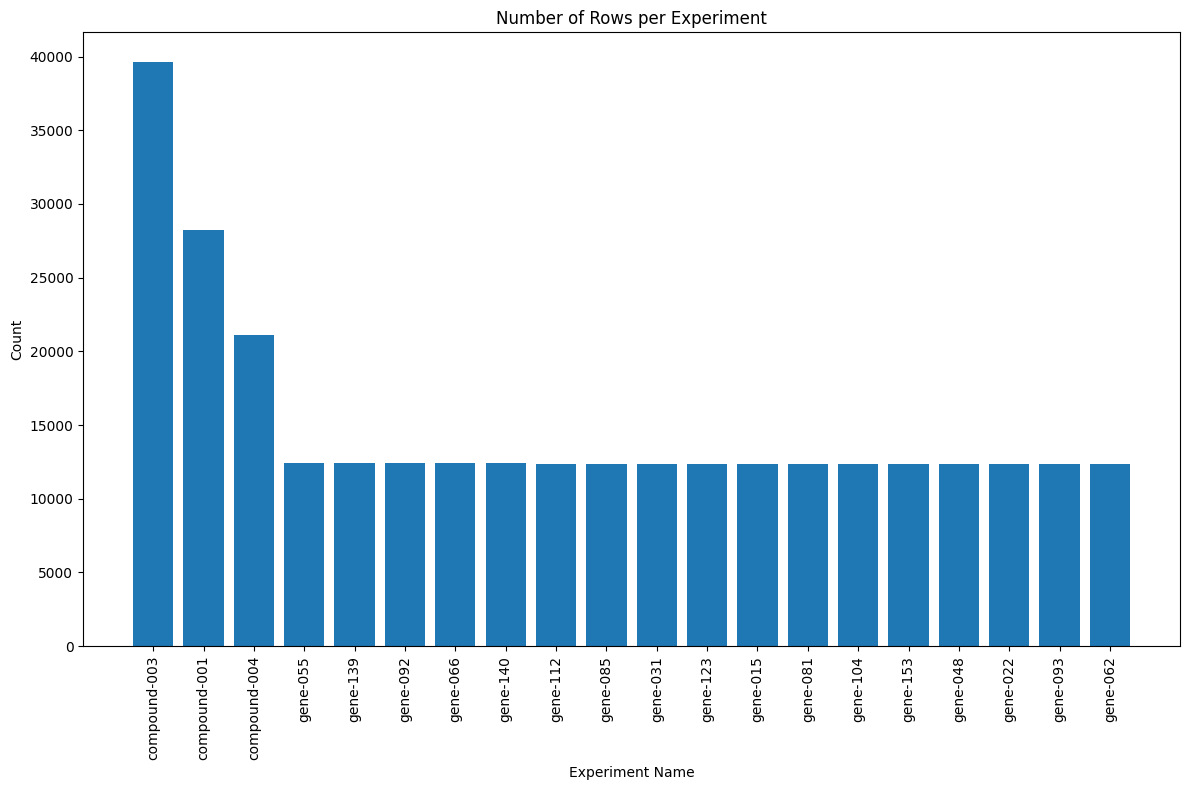

In [10]:
# Get unique experiment names and their counts
experiment_counts = df['experiment_name'].value_counts().reset_index()
experiment_counts.columns = ['experiment_name', 'count']

# Sort by count in descending order
experiment_counts = experiment_counts.sort_values('count', ascending=False)

# Display the results
print(f"Total unique experiment names: {len(experiment_counts)}")
display(experiment_counts)

# Optional: Create a bar chart to visualize the distribution
import matplotlib.pyplot as plt

# Take top 20 experiments if there are many
plot_data = experiment_counts.head(20) if len(experiment_counts) > 20 else experiment_counts

plt.figure(figsize=(12, 8))
plt.bar(plot_data['experiment_name'], plot_data['count'])
plt.xticks(rotation=90)
plt.xlabel('Experiment Name')
plt.ylabel('Count')
plt.title('Number of Rows per Experiment')
plt.tight_layout()
plt.show()